# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [6]:
# import pandas as pd
import numpy as np
import pandas as pd

In [7]:
#lee el archivo de excel saltando las tres primeras filas
frames=[]
for n in range (1995, 2018):
    nombrearchivo='Precio_Bolsa_Nacional_($kwh)_' + str(n)
    if n < 2000:
        skip=3
    else:
        skip=2
    if n >= 2016:
        nombrearchivo += '.xls'
    else:
        nombrearchivo += '.xlsx'    
    x=pd.read_excel(nombrearchivo, skiprows = skip, parse_cols=24)
    frames.append(x)
datos = pd.concat(frames)  
# cambia filas por columnas
w = pd.melt(datos,                           
            id_vars    = ['Fecha'], 
            var_name   = 'Hora',        
            value_name = 'Valores')
print(w[1:10])



        Fecha Hora  Valores
1  1995-07-21    0    1.073
2  1995-07-22    0    1.073
3  1995-07-23    0    1.073
4  1995-07-24    0    1.000
5  1995-07-25    0    0.990
6  1995-07-26    0    0.500
7  1995-07-27    0    0.500
8  1995-07-28    0    0.000
9  1995-07-29    0    1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [8]:
len(w) - len(w.dropna())

238

In [9]:
faltantes=w[w.isnull().T.any().T] # muestra los datos faltantes
faltantes.head()

,Fecha,Hora,Valores
0,1995-07-20,0,NaN
4599,2007-01-11,0,NaN
5336,2009-12-15,0,NaN
6083,NaN,0,NaN
6084,NaN,0,NaN


**3.--** Compute e imprima el número de registros duplicados.

In [10]:
len(w)-len(w.drop_duplicates())

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [11]:
frameDepurada=w.drop_duplicates().dropna()
len(frameDepurada)

189091

In [12]:
frameDepurada.head()

,Fecha,Hora,Valores
1,1995-07-21,0,1.073
2,1995-07-22,0,1.073
3,1995-07-23,0,1.073
4,1995-07-24,0,1.000
5,1995-07-25,0,0.990


**5.--** Compute y grafique el precio promedio diario.

In [13]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

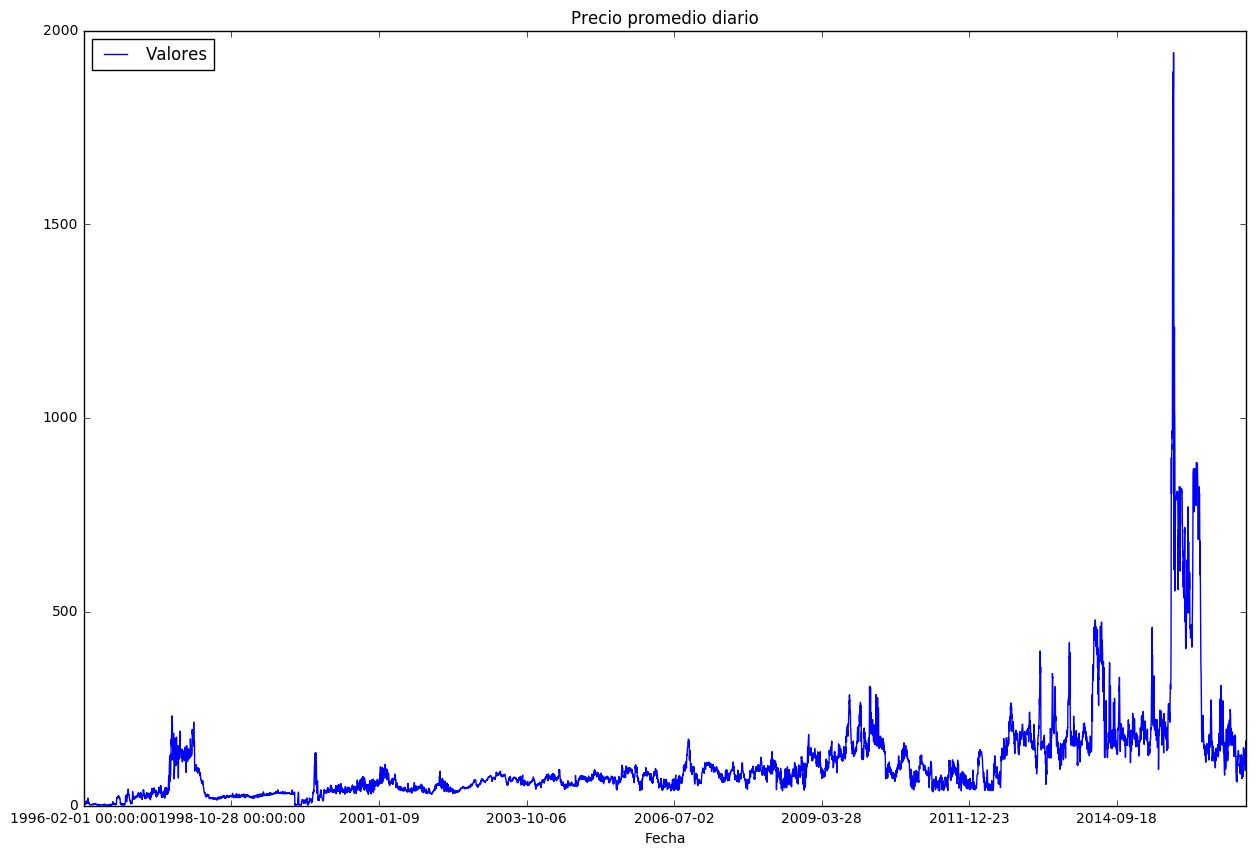

In [14]:
frameDepurada.groupby('Fecha').mean().plot(figsize=(15, 10), title='Precio promedio diario')

**6.--** Compute y grafique el precio máximo por mes.

        Fecha Hora  Valores      key
1  1995-07-21    0    1.073  1995-07
2  1995-07-22    0    1.073  1995-07
3  1995-07-23    0    1.073  1995-07
4  1995-07-24    0    1.000  1995-07
5  1995-07-25    0    0.990  1995-07


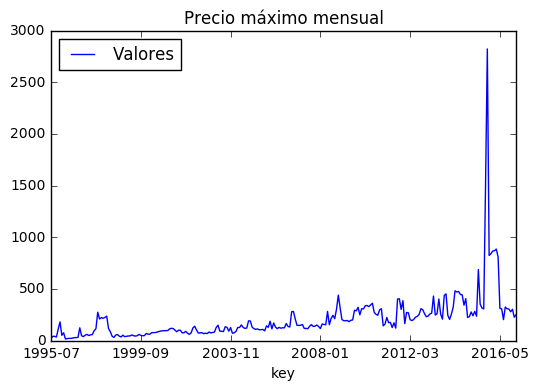

In [15]:
#crea una columna que diga el mes
x=[]
for i in range(len(frameDepurada)):
    x.append(str(frameDepurada.iat[i,0])[0:7])
frameDepurada['key'] = x
print(frameDepurada.head())

%matplotlib inline
frameDepurada.groupby('key').max().plot(title='Precio máximo mensual')

**7.--** Compute y grafique el precio mínimo mensual.

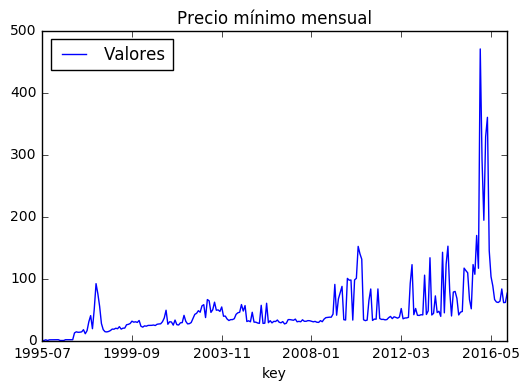

In [16]:
%matplotlib inline
frameDepurada.groupby('key').min().plot(title='Precio mínimo mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

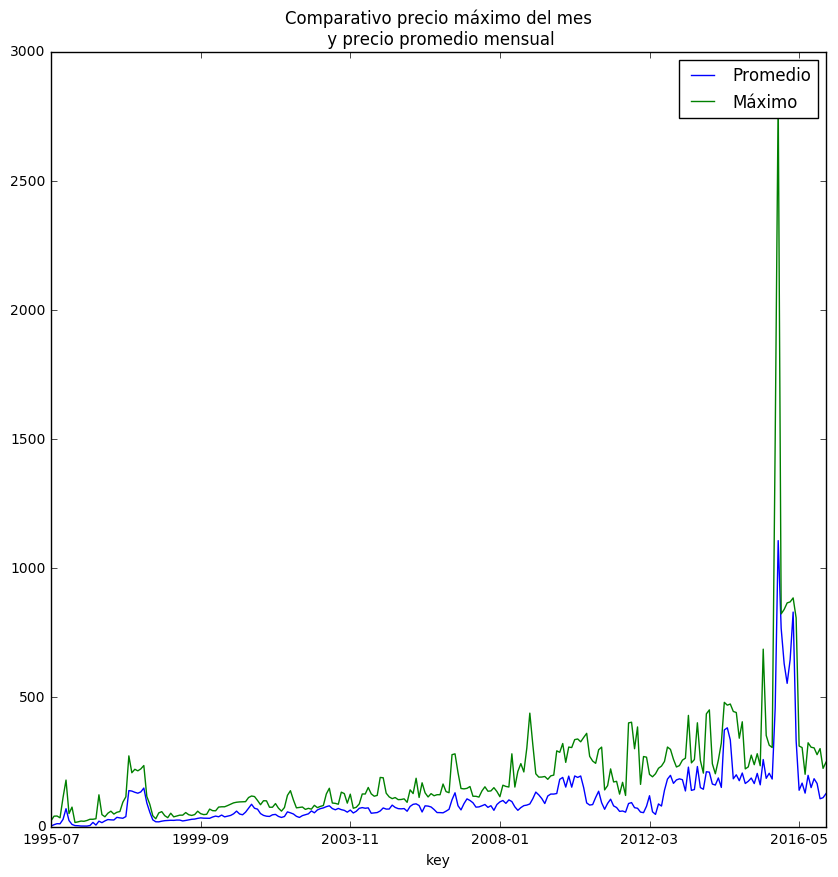

In [17]:
%matplotlib inline
a = frameDepurada.groupby('key').mean().plot(figsize=(10, 10))
frameDepurada.groupby('key').max().plot(ax=a,  title='Comparativo precio máximo del mes\n y precio promedio mensual')

#leyenda del gráfico
a.legend(['Promedio','Máximo'])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [18]:
import calendar as cl
import datetime as dt

x=[]

for i in range(len(frameDepurada)):
    dia = cl.day_name[dt.datetime.strptime(str(frameDepurada.iat[i,0])[0:10], '%Y-%m-%d').date().weekday()]
    x.append(dia)
frameDepurada['dia']=x
frameDepurada.head()

,Fecha,Hora,Valores,key,dia
1,1995-07-21,0,1.073,1995-07,Friday
2,1995-07-22,0,1.073,1995-07,Saturday
3,1995-07-23,0,1.073,1995-07,Sunday
4,1995-07-24,0,1.000,1995-07,Monday
5,1995-07-25,0,0.990,1995-07,Tuesday


In [20]:
# filtra días laborales
dias_semana = frameDepurada.loc[frameDepurada['dia'].isin(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
dias_semana.head()

,Fecha,Hora,Valores,key,dia
1,1995-07-21,0,1.073,1995-07,Friday
4,1995-07-24,0,1.000,1995-07,Monday
5,1995-07-25,0,0.990,1995-07,Tuesday
6,1995-07-26,0,0.500,1995-07,Wednesday
7,1995-07-27,0,0.500,1995-07,Thursday


(array([   41.,    16.,    72.,   502.,  1245.,   811.,  1467.,  2573.,
         5432.,   523.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

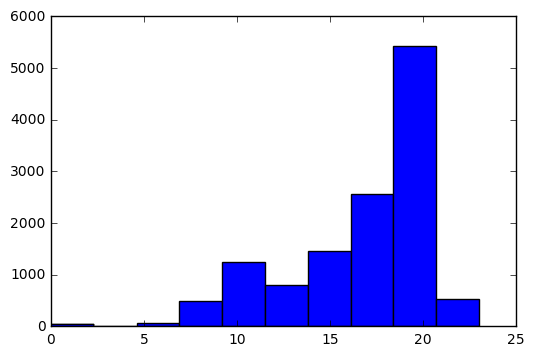

In [21]:
import matplotlib.pyplot as plt

hora_maxPrecio_dia = dias_semana.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_dia = hora_maxPrecio_dia.reset_index()

   
hora_maxPrecio_dia['Fecha'] = hora_maxPrecio_dia['Fecha'].astype(str)
graficar = pd.merge(frameDepurada,hora_maxPrecio_dia)


plt.hist(graficar['Hora'].astype(int))


**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

(array([   24.,    12.,    15.,   156.,   361.,   287.,   109.,   491.,
         1248.,   217.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

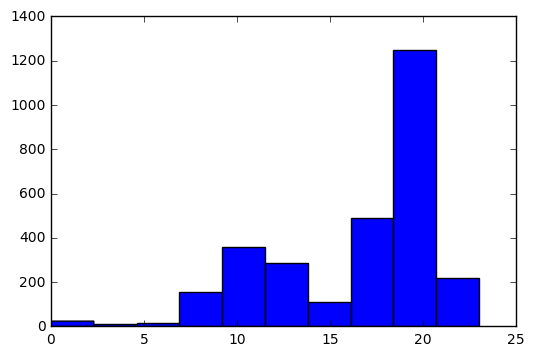

In [45]:
# filtra días sabado
dia_sabado = frameDepurada.loc[frameDepurada['dia'].isin(['Saturday'])]

hora_maxPrecio_sabado = dia_sabado.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_sabado = hora_maxPrecio_sabado.reset_index()

hora_maxPrecio_sabado['Fecha'] = hora_maxPrecio_sabado['Fecha'].astype(str)
graficar_2 = pd.merge(frameDepurada,hora_maxPrecio_sabado)

plt.hist(graficar_2['Hora'].astype(int))

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

(array([   65.,    32.,    23.,    68.,    99.,   120.,    82.,   399.,
         1435.,   333.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

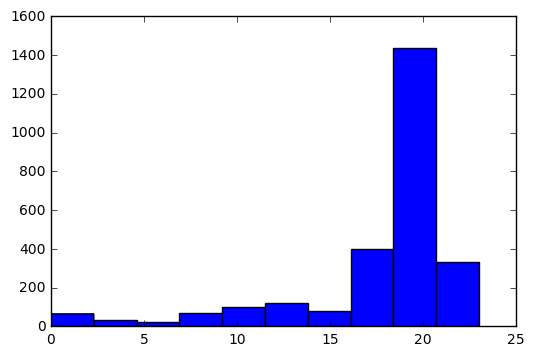

In [23]:
# filtra días domingo
dia_domingo = frameDepurada.loc[frameDepurada['dia'].isin(['Sunday'])]

# trae el precio max para cada fecha
hora_maxPrecio_domingo = dia_domingo.groupby(['Fecha'])['Valores'].max()
hora_maxPrecio_domingo = hora_maxPrecio_domingo.reset_index()

hora_maxPrecio_domingo['Fecha'] = hora_maxPrecio_domingo['Fecha'].astype(str)
graficar_3 = pd.merge(frameDepurada,hora_maxPrecio_domingo)

plt.hist(graficar_3['Hora'].astype(int))

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [46]:
# crea una columna que diga el año
x=[]

for i in range(len(frameDepurada)):
    year=str(frameDepurada.iat[i,0])[0:4]
    x.append(year)
frameDepurada['año']=x

# trae el precio min para cada año
minPrecio_año = frameDepurada.groupby(['año'])['Valores'].min()
minPrecio_año = minPrecio_año.reset_index()
print(minPrecio_año)

minPrecio_año['año'] = minPrecio_año['año'].astype(str)
graficar_4 = pd.merge(frameDepurada,minPrecio_año)

c=graficar_4[['año','Fecha','Valores']] # fecha exacta
c.drop_duplicates()

     año    Valores
0   1995   0.000000
1   1996   0.000000
2   1997  10.882310
3   1998  13.847330
4   1999  18.359530
5   2000  21.531167
6   2001  24.822879
7   2002  26.777682
8   2003  37.013438
9   2004  32.252998
10  2005  27.581415
11  2006  26.714797
12  2007  30.173824
13  2008  29.199135
14  2009  32.892503
15  2010  32.024957
16  2011  33.291100
17  2012  34.988099
18  2013  40.415346
19  2014  38.941951
20  2015  46.791501
21  2016  61.100689
22  2017  61.356315


,año,Fecha,Valores
0,1995,1995-07-28,0.000000
1,1995,1995-07-31,0.000000
2,1995,1995-08-01,0.000000
3,1995,1995-10-13,0.000000
9,1995,1995-07-29,0.000000
10,1995,1995-07-30,0.000000
46,1995,1995-07-26,0.000000
51,1996,1996-06-30 00:00:00,0.000000
52,1996,1996-07-09 00:00:00,0.000000
53,1996,1996-07-12 00:00:00,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

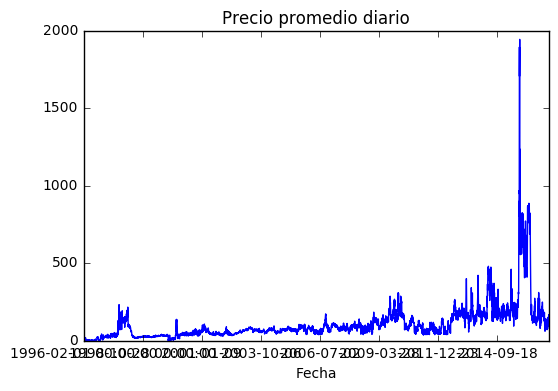

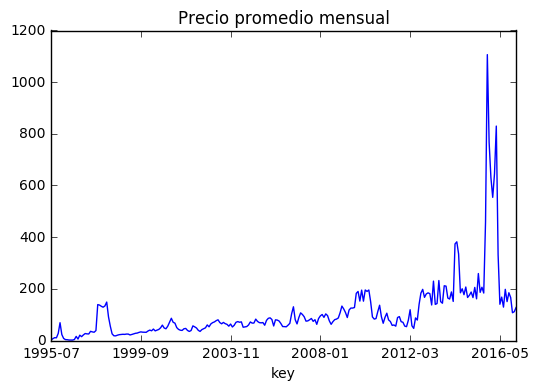

In [66]:
plt.title('Precio promedio diario')
precio_prom_día = frameDepurada.groupby(['Fecha'])['Valores'].mean().plot()
plt.show()

plt.title('Precio promedio mensual')
precio_prom_mes = frameDepurada.groupby(['key'])['Valores'].mean().plot()
plt.show()


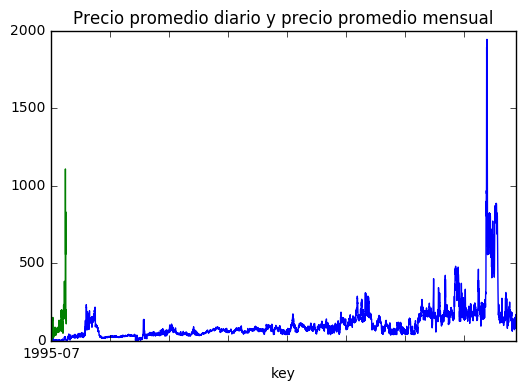

In [65]:
plt.title('Precio promedio diario y precio promedio mensual')
precio_prom_día = frameDepurada.groupby(['Fecha'])['Valores'].mean().plot()
plt.hold(True)


precio_prom_mes = frameDepurada.groupby(['key'])['Valores'].mean().plot()
plt.show()

---